Exploration of bagging, decision trees, random forests and grid search.
The provided examples should be helpful when setting up more specialised pipelines.

In [5]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#Import data 
#The examples will focus on classification
data_wine=load_wine()

data=pd.DataFrame(data=data_wine.data,columns=data_wine.feature_names)
target=data_wine.target
target_names=data_wine.target_names

['class_0' 'class_1' 'class_2']
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453    

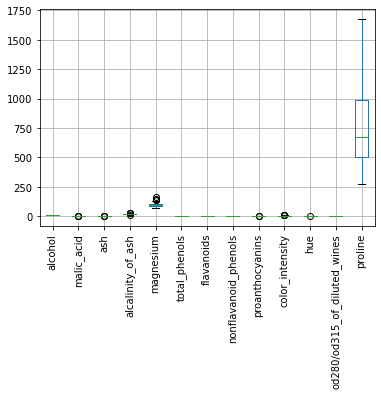

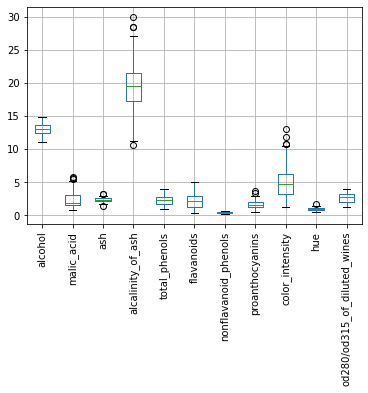

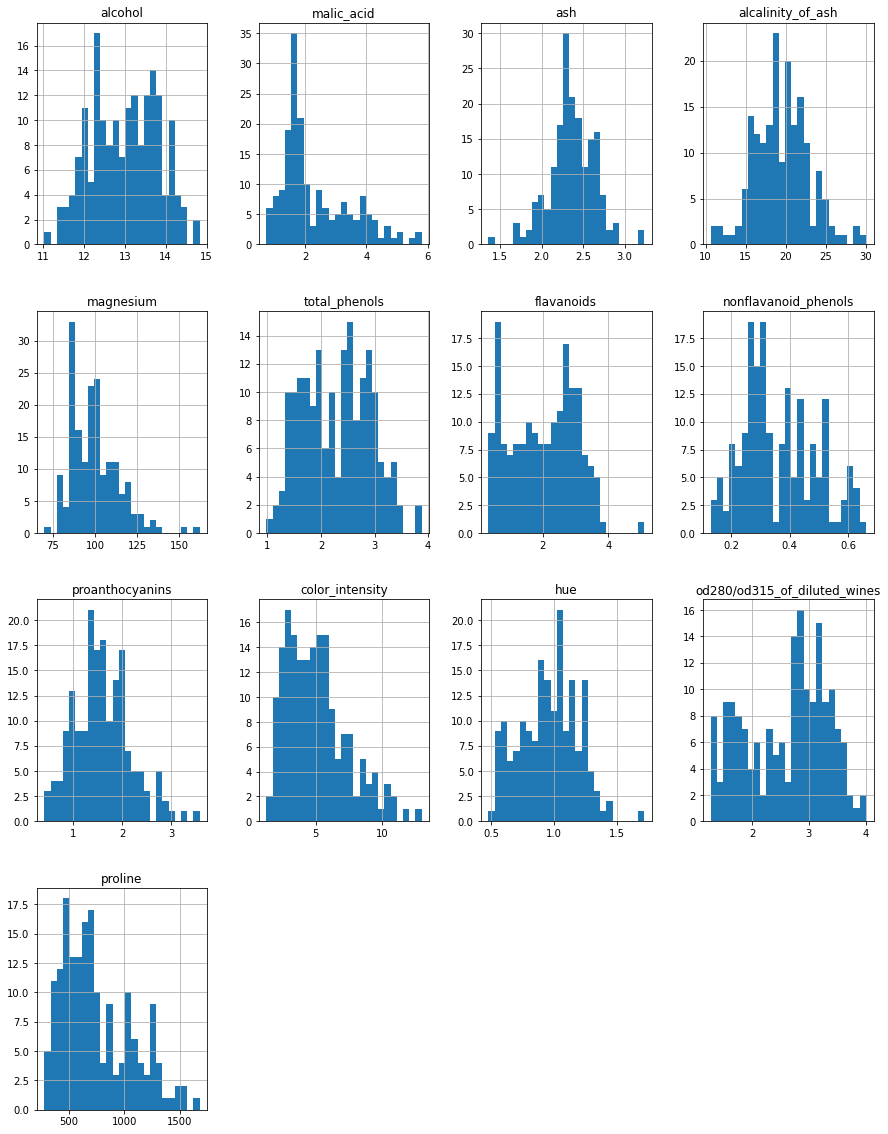

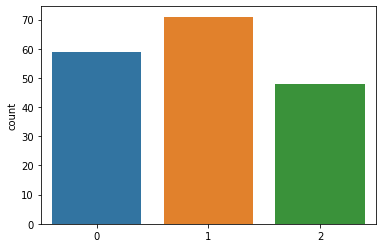

In [8]:
#Explore data 
print(target_names)

#Get descriptive statisctics
print(data.describe())
#Explore value distribution 
data.boxplot(rot=90)
plt.show()

#Explore value distribution without proline and magnesium
data.drop(columns=['proline','magnesium']).boxplot(rot=90)
plt.show()

#Explore feature distributions for potential outliers
data.hist(figsize=(15,20),bins=25)
plt.show()

#Assess target value counts  to evaluate if the data is balanced
sns.countplot(target)
plt.show()

In [14]:
#Assess correlations
df=data.copy()
df['target']=target

fig,ax=plt.subplots(figsize=(15,20))
sns.pairplot(df,hue='target',kind='reg',diag_kind='kde')
plt.show()

#Get value correlations
fig,ax=plt.subplots(figsize=(15,20))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='Blues')
plt.show()

In [ ]:
#Explore if there are duplicate or missing values

print("Duplicated values {}".format(df.duplicated().sum())."\n")

print("Missing values {}".format(df.isna().sum()),"\n")


In [ ]:
#Prepare data for modelling

#Split data
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=0)

#Transform data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)